In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
hdr = ['n', 'sim_evals', 'runtime_s', 'runtime_cycles', 'flops']

# Empirical Complexity
Since our algorithm is randomized and approximative in nature, it is difficult to pin down the exact number of comparisons. The approach in the paper was to derive an empirical complexity.

We instrumented our code using standard gcc tools and counted the number of distance metric (similarity measure) evaluations. In order to ensure that our synthetic dataset behaves (approximatively) similiar to a real world dataset, we derive the empirical complexity on both datasets for our algorithm.

In [2]:
gauss = pd.read_csv("zenv1_gaussian_dim100_logn8to18_k20_T1", sep=' ', names=hdr)
audio = pd.read_csv("zenv1_audio_dim170_logn8to16_k20_T1", sep=' ', names=hdr)

n_log = np.log2(gauss['n']) # n
simeval_log = np.log2(gauss['sim_evals']) # sim evals

coefs = np.polyfit(n_log, simeval_log,1)
exp = coefs[0]
intercept = coefs[1]

print("Coefs in loglog plot:",exp,"*logn + ",intercept)
print("empirical complexity: O(",2**intercept,"n**",exp,")")




Coefs in loglog plot: 1.1146507043305411 *logn +  9.201095784174965
empirical complexity: O( 588.5804382414472 n** 1.1146507043305411 )


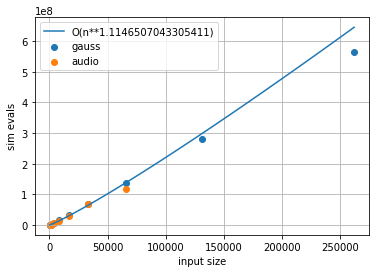

In [3]:
plt.scatter(gauss['n'], gauss['sim_evals'], label='gauss')
plt.scatter(audio['n'], audio['sim_evals'], label='audio')

# 100 linearly spaced numbers
x = np.linspace(np.min(gauss['n']),np.max(gauss['n']),100)
y = (2**intercept) * x**exp

plt.plot(x,y, label='O(n**'+str(exp)+')')

plt.xlabel('input size')
plt.ylabel('sim evals')
plt.grid(True)
plt.legend()
plt.show()

Our synthetic dataset has an empirical complexity in O(n\*\*1.12), which is close enough to the empirical complexity of the algorithm derived on several real world datasets in the publication (which is O(n\*\*1.14)). We conclude that our synthetic dataset is suitable for evaluating performance. Performance gains on this dataset should imply performance gains on a real world dataset.

# Performance Plot
For each dataset we ran the algorithm twice. Once we measured the runtime and once we instrumentized our code to count the number of similarity evaluations (which is proportional to number of flops).

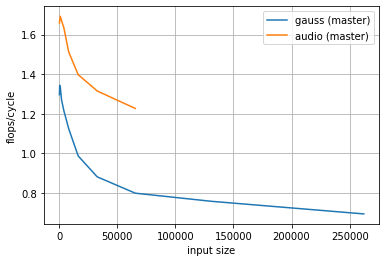

In [4]:
plt.plot(gauss['n'], gauss['flops']/gauss['runtime_cycles'], label='gauss (master)')
plt.plot(audio['n'], audio['flops']/audio['runtime_cycles'], label='audio (master)')

# 100 linearly spaced numbers

plt.ylabel('flops/cycle')
plt.xlabel('input size')
plt.grid(True)
plt.legend()
plt.show()

## Interpretation
The audio dataset has around 170 features (almost twice as many as the gaussian) and thus simply gets a chance to do more flops. Maybe a comparison between similarity evals is more meaningufl? (plotted below)

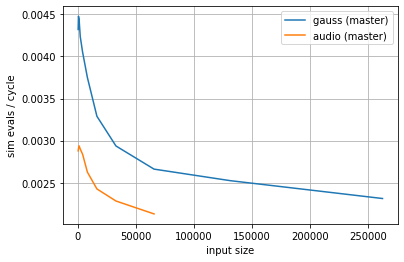

In [5]:
plt.plot(gauss['n'], gauss['sim_evals']/gauss['runtime_cycles'], label='gauss (master)')
plt.plot(audio['n'], audio['sim_evals']/audio['runtime_cycles'], label='audio (master)')

# 100 linearly spaced numbers
plt.ylabel('sim evals / cycle')
plt.xlabel('input size')
plt.grid(True)
plt.legend()
plt.show()

Not really, now the audio sim evals simply take longer and we can thus do fewer of them. Having two dataset with different dimensions in the same plot probabily simply doens't make any sense...

# T0 vs T1
The two tags T0 and T1 on gaussian in one plot

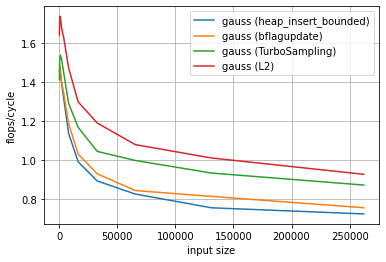

In [15]:
gauss_t0 = pd.read_csv("zenv1_gaussian_dim100_logn8to18_k20_T0", sep=' ', names=hdr)
gauss_t2 = pd.read_csv("zenv1_gaussian_dim100_logn8to18_k20_T2", sep=' ', names=hdr)
gauss_hib = pd.read_csv("zenv1_gaussian_dim100_logn8to18_k20_heap_insert_bounded", sep=' ', names=hdr)
gauss_t3 = pd.read_csv("zenv1_gaussian_dim100_logn8to18_k20_bflagupdate", sep=' ', names=hdr)
gauss_turbosamp = pd.read_csv("zenv1_gaussian_dim100_logn8to18_k20_turbosampling", sep=' ', names=hdr)
gauss_l2 = pd.read_csv("zenv1_gaussian_dim100_logn8to18_k20_l2", sep=' ', names=hdr)




#plt.plot(gauss['n'], gauss['flops']/gauss['runtime_cycles'], label='gauss (T1, master)')
#plt.plot(gauss_t0['n'], gauss_t0['flops']/gauss_t0['runtime_cycles'], label='gauss (T0, master)')
plt.plot(gauss_hib['n'], gauss_turbosamp['flops']/gauss_hib['runtime_cycles'], label='gauss (heap_insert_bounded)')
plt.plot(gauss_t3['n'], gauss_turbosamp['flops']/gauss_t3['runtime_cycles'], label='gauss (bflagupdate)')
plt.plot(gauss_turbosamp['n'], gauss_turbosamp['flops']/gauss_turbosamp['runtime_cycles'], label='gauss (TurboSampling)')
plt.plot(gauss_l2['n'], gauss_turbosamp['flops']/gauss_l2['runtime_cycles'], label='gauss (L2)')

gauss_t3
# 100 linearly spaced numbers

plt.ylabel('flops/cycle')
plt.xlabel('input size')
plt.grid(True)
plt.legend()
plt.show()

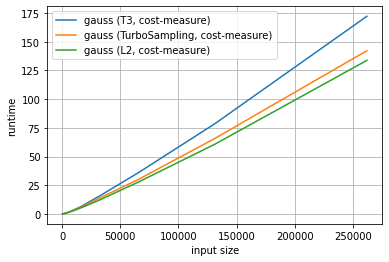

In [18]:
plt.plot(gauss_t3['n'], gauss_t2['runtime_s'], label='gauss (T3, cost-measure)')
plt.plot(gauss_turbosamp['n'], gauss_turbosamp['runtime_s'], label='gauss (TurboSampling, cost-measure)')
plt.plot(gauss_l2['n'], gauss_l2['runtime_s'], label='gauss (L2, cost-measure)')

gauss_t3
# 100 linearly spaced numbers

plt.ylabel('runtime')
plt.xlabel('input size')
plt.grid(True)
plt.legend()
plt.show()